# Animal Sequence Emergence Predictions

For each animal sequence:
1. Compute the HA and NA risk using Emergenet (using pretrained Enets from all human strains within 1 year of the present, **1/1/2023 - 1/1/2024**)
2. Predict IRAT emergence scores with `emergenet.emergenet.predict_irat_emergence`
3. Save results: `results/animal_predictions/animal.csv`

    
### Running Processes

Computations are done in:
- `animal_predictions.py`
- `run_animal_predictions.sh`

To run, navigate to terminal and do

`chmod ugo+rwx run_animal_predictions.sh`

`./run_animal_predictions.sh`

In [38]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')
from emergenet.emergenet import predict_irat_emergence


RESULT_DIR = 'results/animal_predictions/'

In [35]:
# Get list of all subsets
pattern = 'animal[0-9]*.csv'
file_list = glob.glob(f'{RESULT_DIR}/{pattern}')
animal = pd.DataFrame()
for file in file_list:
    df = pd.read_csv(file)
    animal = pd.concat([animal, df], ignore_index=True)

# Predict emergence risk
animal['geom_mean_risk'] = np.sqrt(animal['ha_risk'] * animal['na_risk'])
animal[['emergence', 'emergence_low', 'emergence_high']] = animal.apply(lambda row: predict_irat_emergence(row['ha_risk'], row['na_risk']), axis=1, result_type='expand')
animal = animal.sort_values(by='emergence', ascending=False).reset_index(drop=True)
animal.to_csv(RESULT_DIR + 'animal.csv', index=False)
animal[['name', 'subtype', 'date', 'emergence']].round(3)

,name,subtype,date,emergence
0,A/swine/North_Carolina/A02751333/2022,H3N2,2022-12-13,7.733
1,A/swine/Missouri/A02524408/2023,H3N2,2023-01-13,7.733
2,A/swine/Iowa/CEIRS-1495/2023,H1N2,2023-06-15,7.733
3,A/swine/Tver_region/RII-81-1S/2023,H1N1,2023-02-17,7.733
4,A/swine/Indiana/A01812310/2020,H1N1,2020-08-17,7.732
...,...,...,...,...
6349,A/chicken/China/2106/2021,H9N2,2021-11-30,3.054
6350,A/chicken/China/2034/2020,H9N2,2020-01-20,3.050
6351,A/chicken/China/2040/2020,H9N2,2020-01-10,3.050
6352,A/green-winged-teal/Georgia/DT-22246/2020,H5N8,2020-09-29,3.046


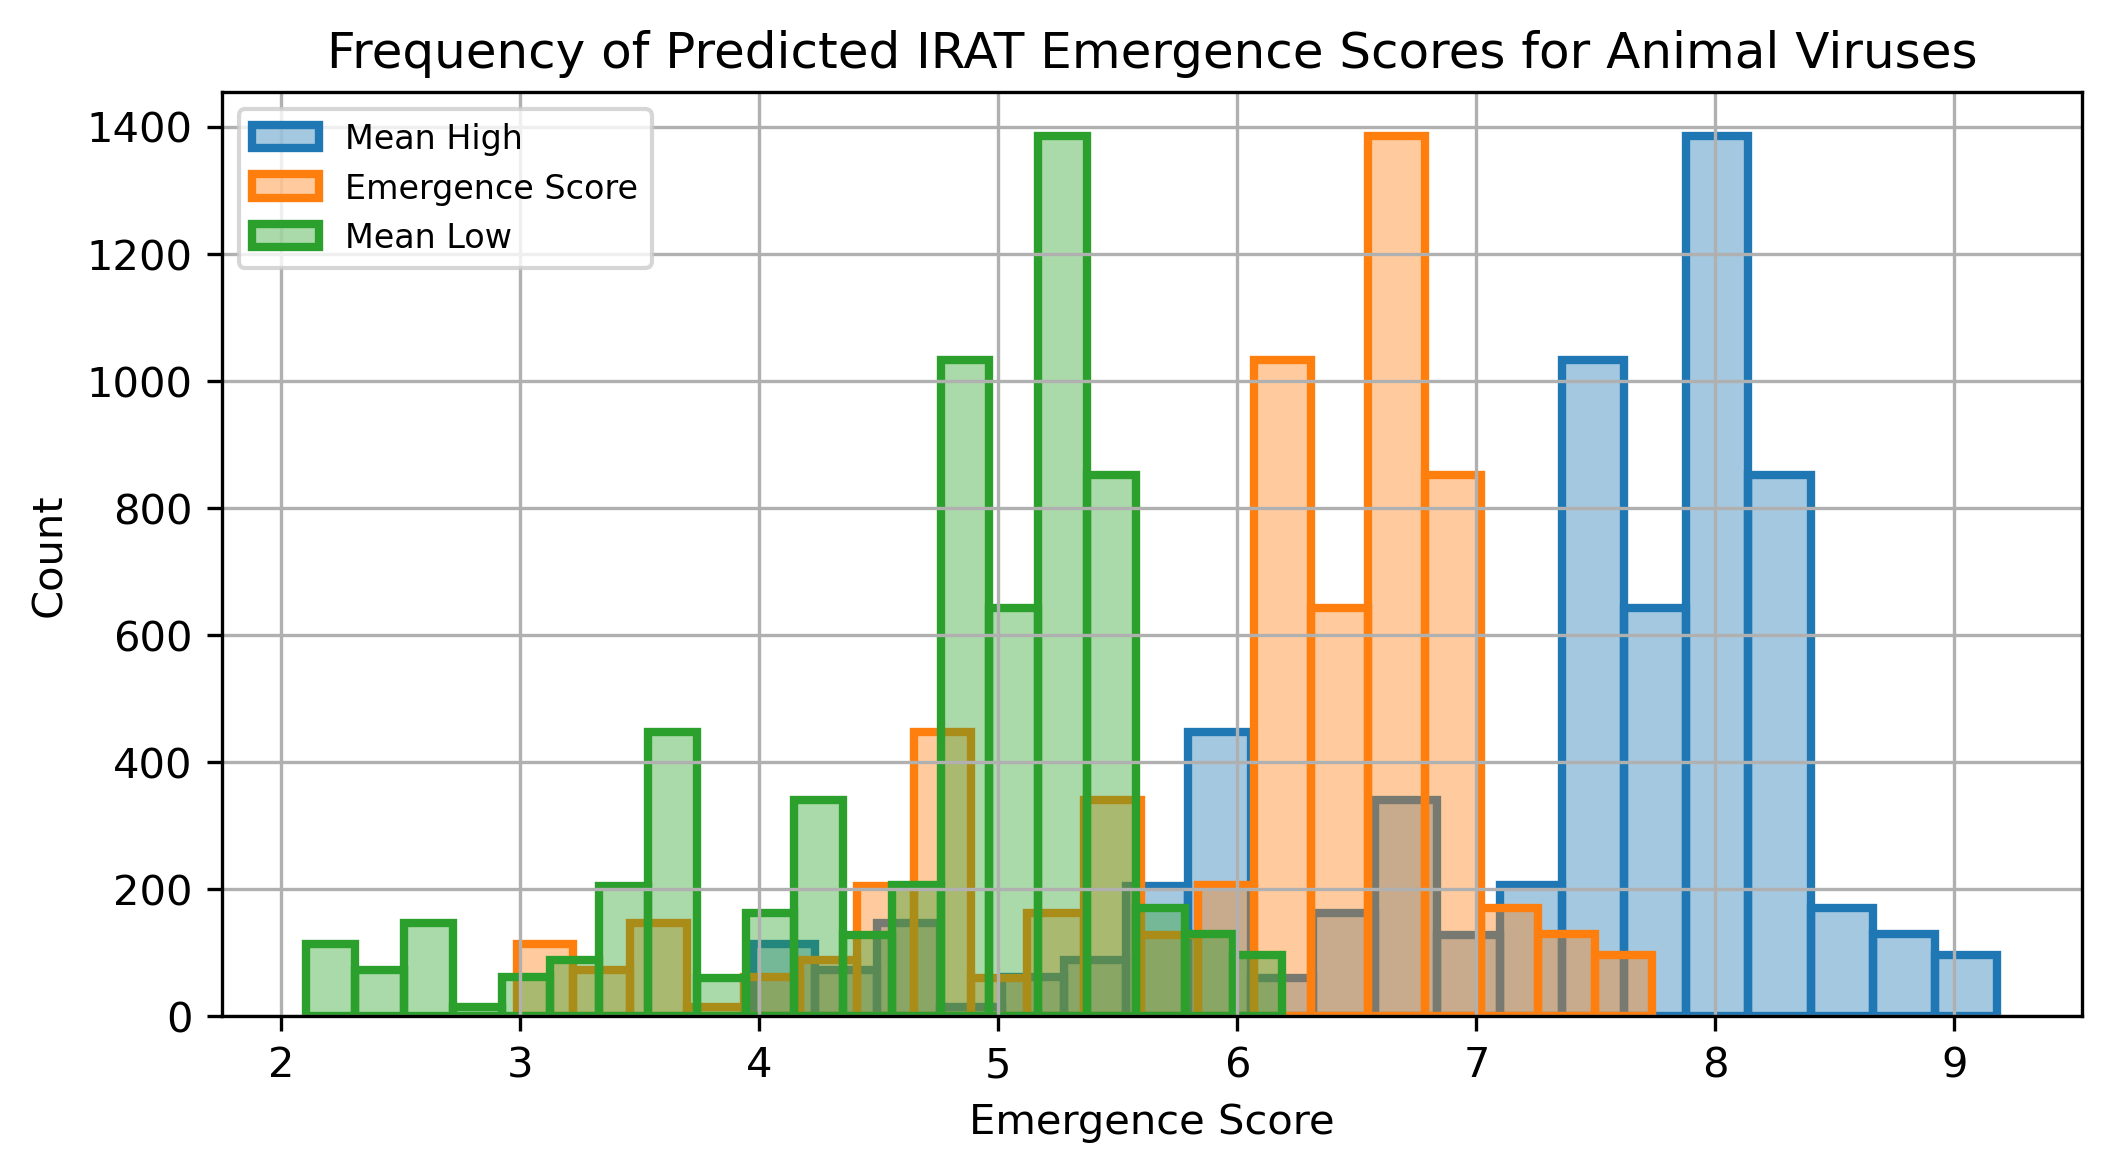

In [110]:
sns.histplot(animal['emergence_high'], label='Mean High', alpha=0.4, color='#1f77b4', linewidth=2, edgecolor='#1f77b4', bins=20)
sns.histplot(animal['emergence'], label='Emergence Score', alpha=0.4, color='#ff7f0e', linewidth=2, edgecolor='#ff7f0e', bins=20)
sns.histplot(animal['emergence_low'], label='Mean Low', alpha=0.4, color='#2ca02c', linewidth=2, edgecolor='#2ca02c', bins=20)

plt.xlabel('Emergence Score')
plt.title('Frequency of Predicted IRAT Emergence Scores for Animal Viruses')
plt.grid()
plt.legend(fontsize=8)
plt.savefig('tables/animal.png',bbox_inches='tight',transparent=True);